In [1]:
import prep
import prsa
import os
import numpy as np
import biosppy
import scipy.signal as ss
import matplotlib.pyplot as plt

In [2]:
NORMO_DIR = './data_2/normokapnia'
HYPER_DIR = './data_2/hiperkapnia'

ABP_COLUMN = 'abp_finger_mm_hg_[abp_finger_mm_Hg_]'
ALTERNATIVE_ABP_COLUMN = 'abp_finger[abp_finger]'

90


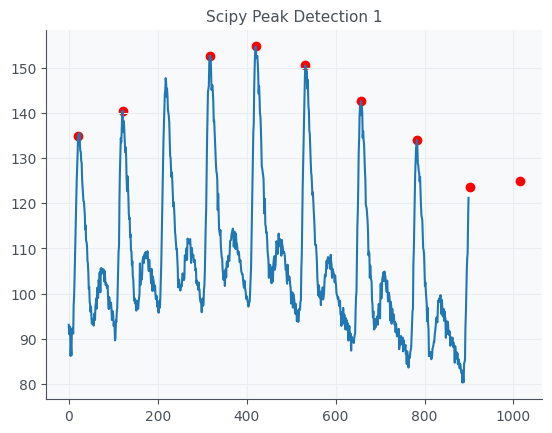

90


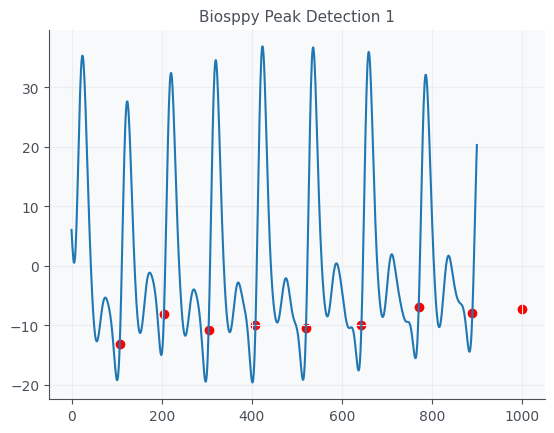

60


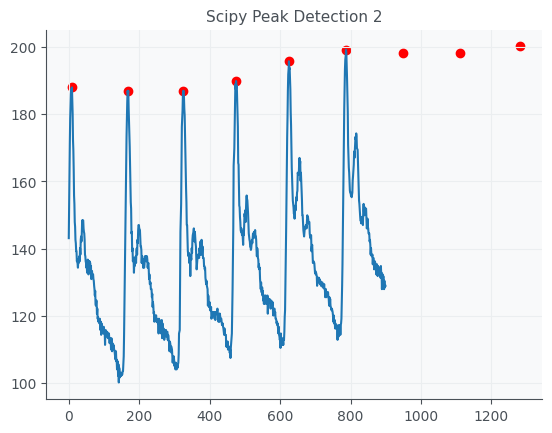

2


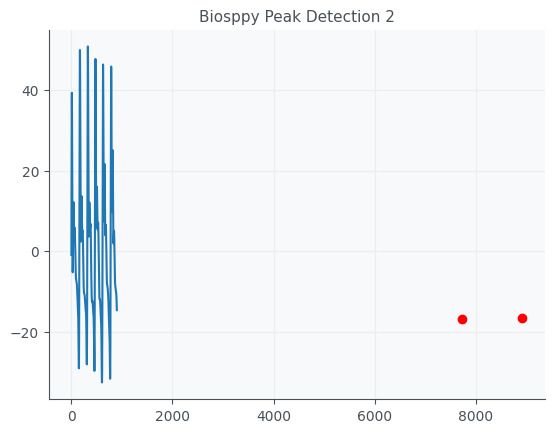

52


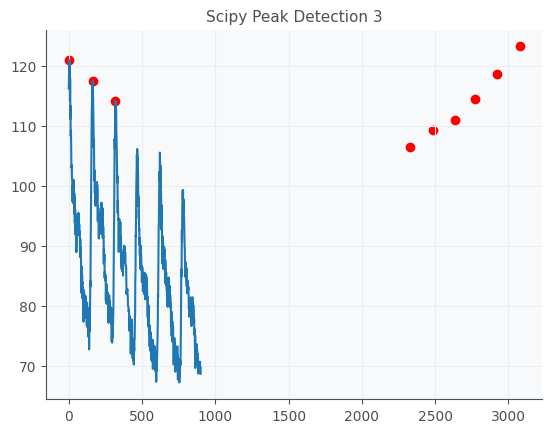

3


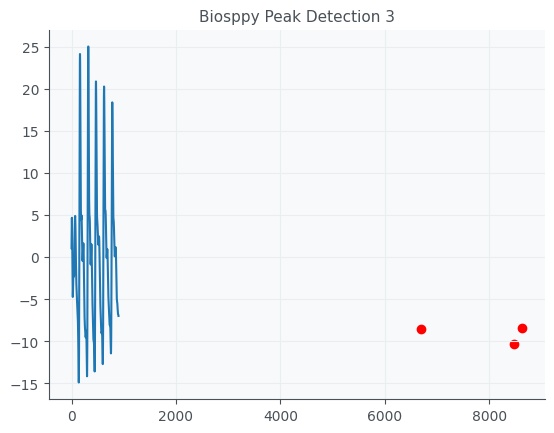

50


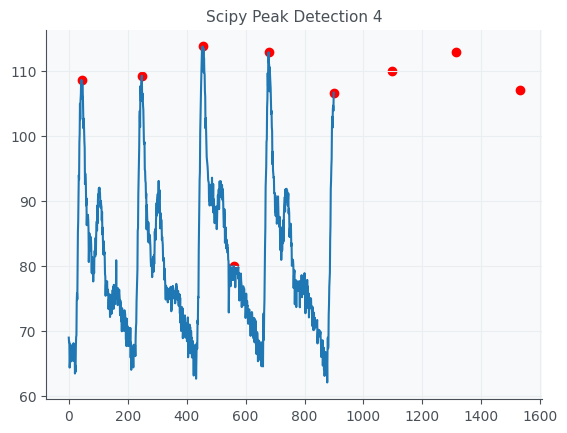

6


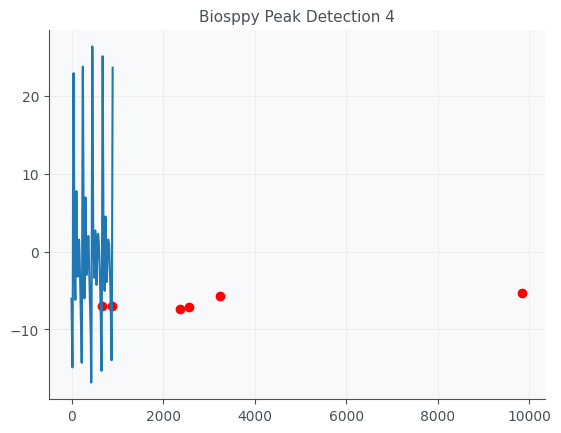

79


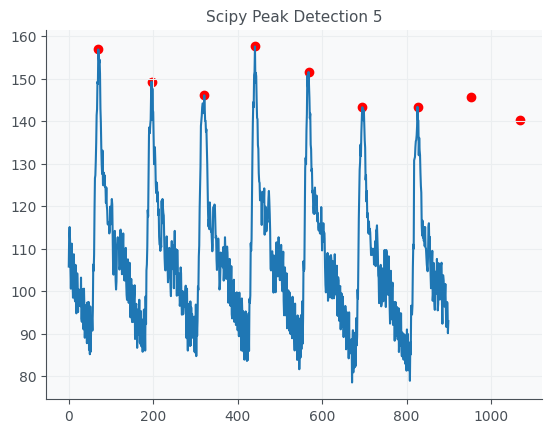

26


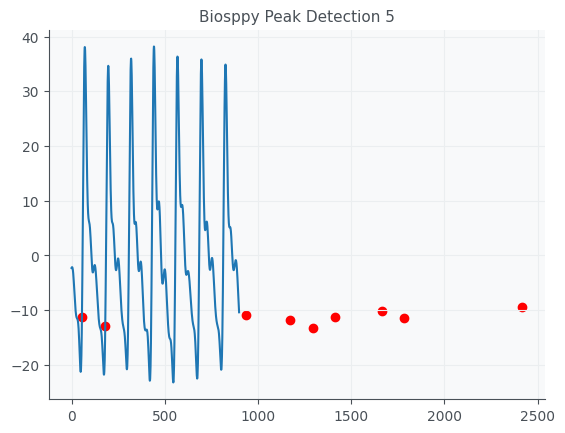

58


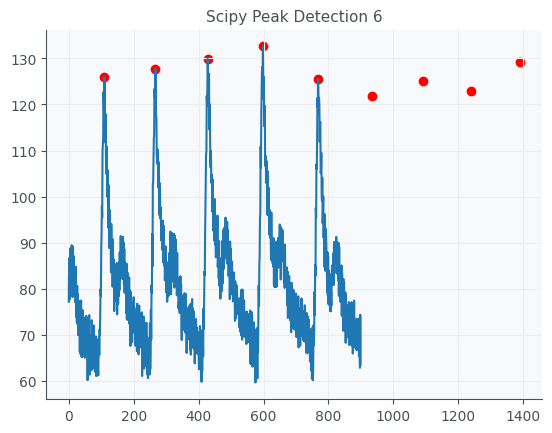

58


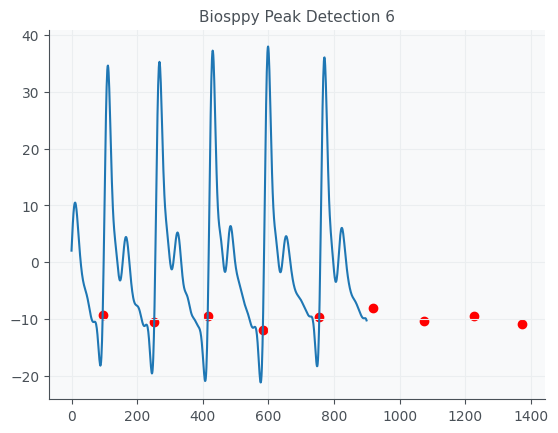

72


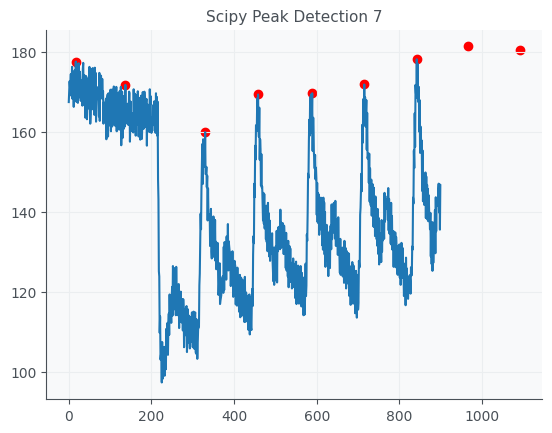

24


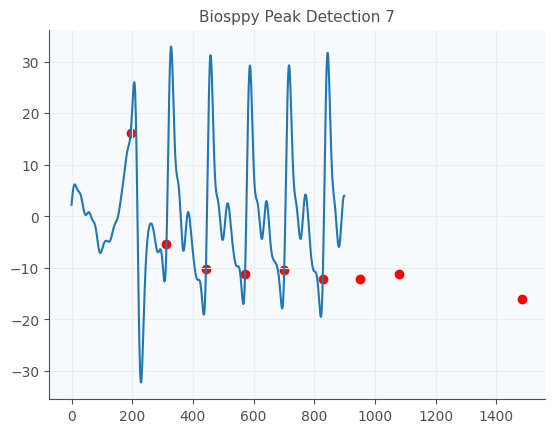

71


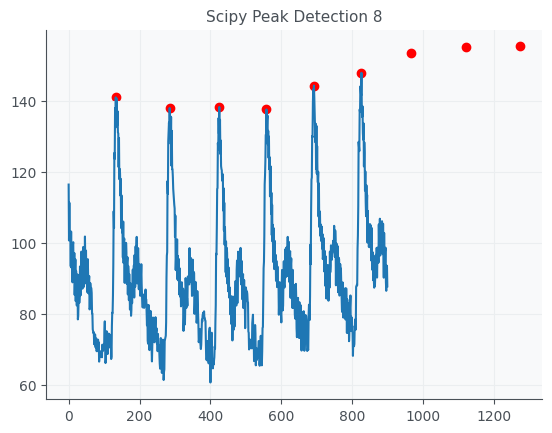

71


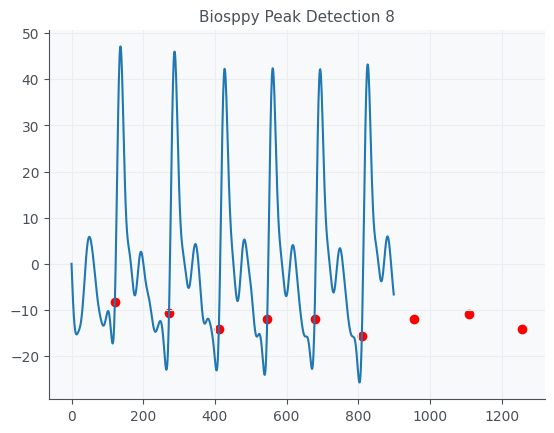

53


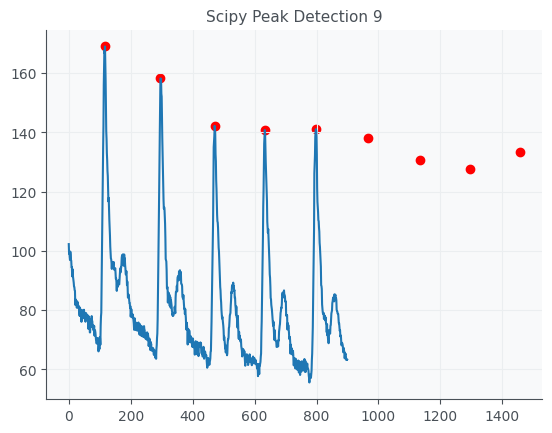

56


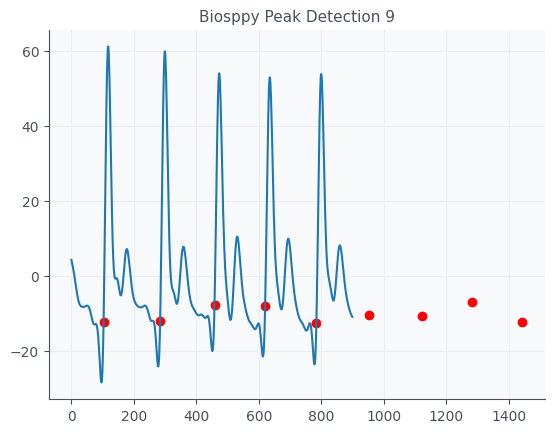

61


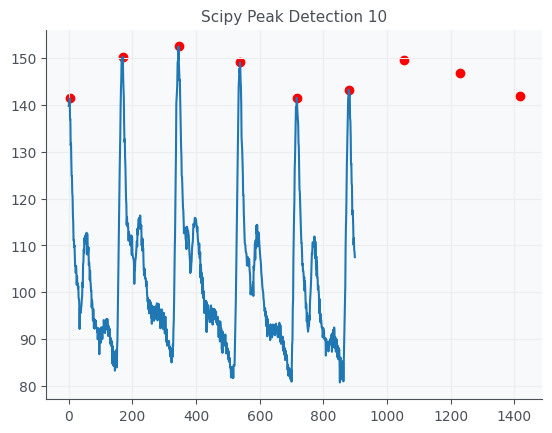

60


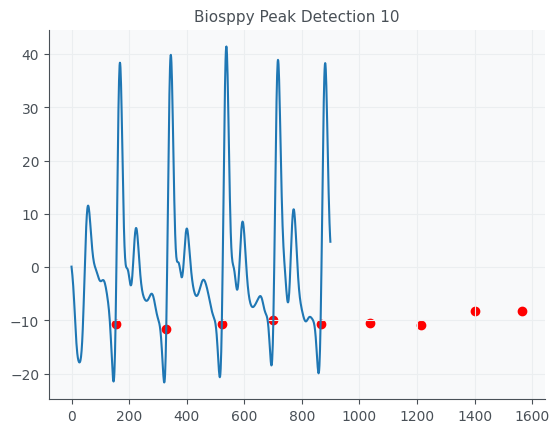

58


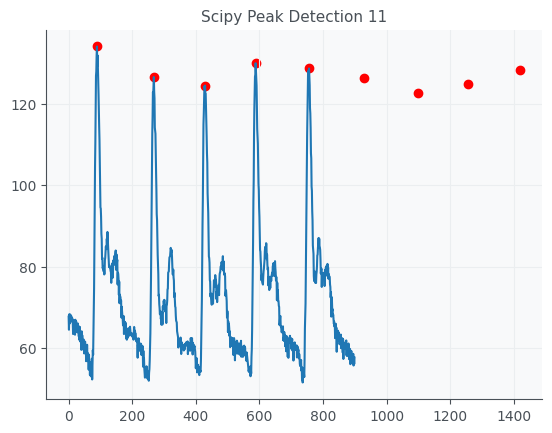

25


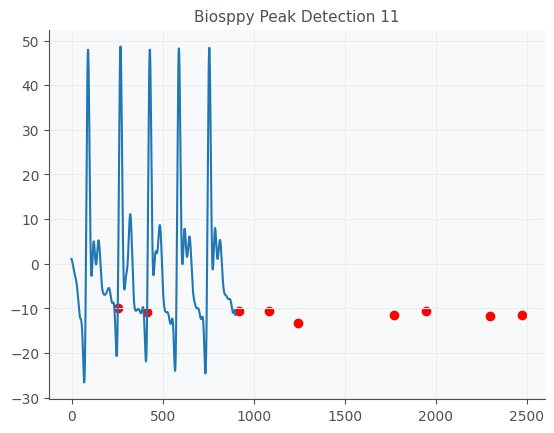

74


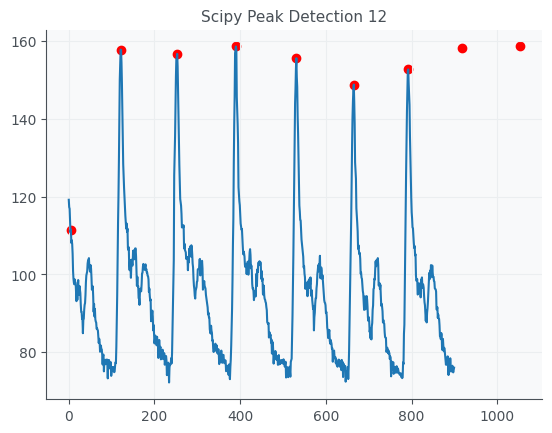

15


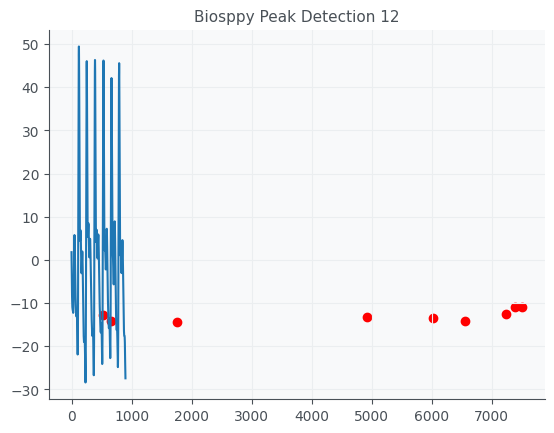

65


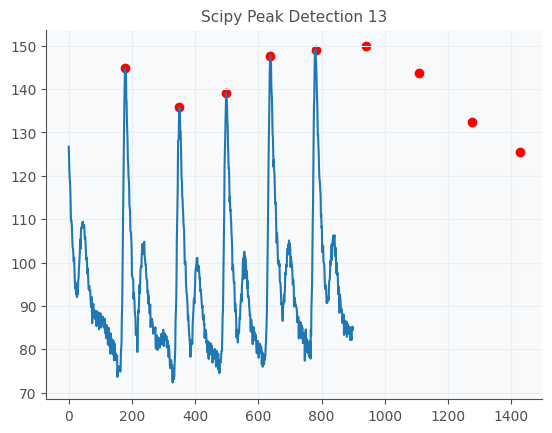

65


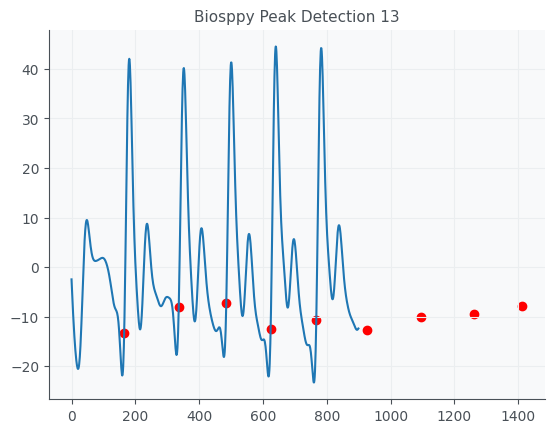

55


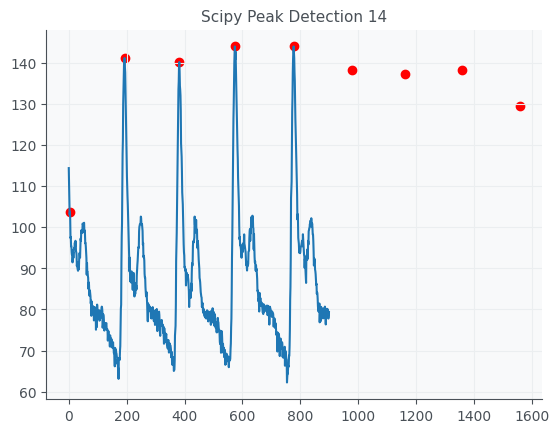

55


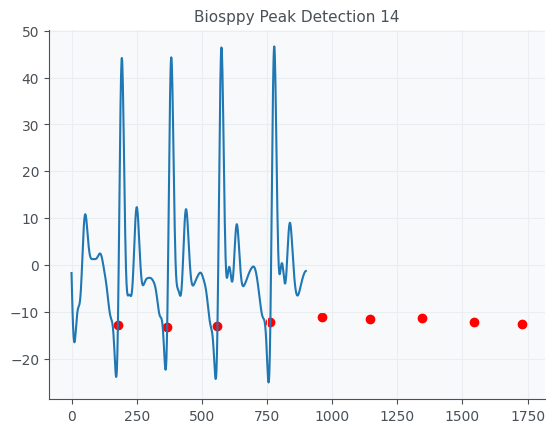

70


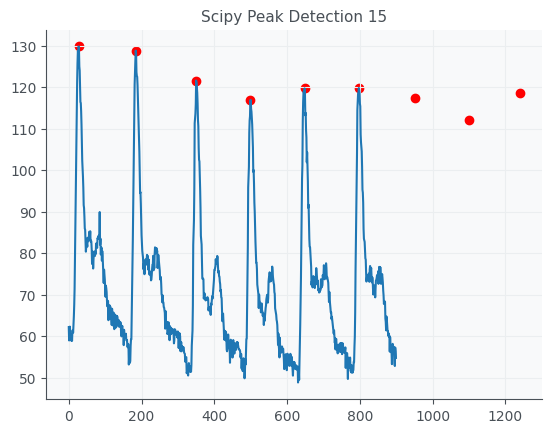

68


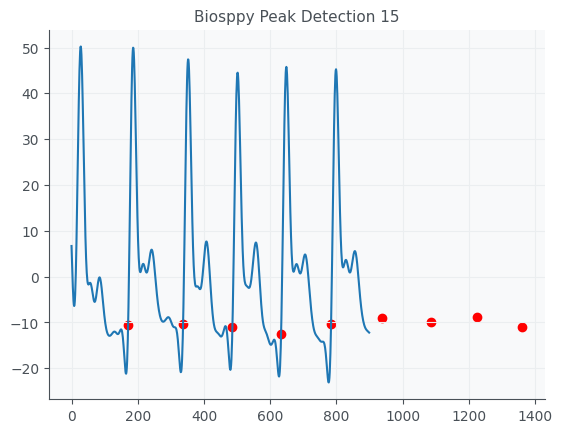

69


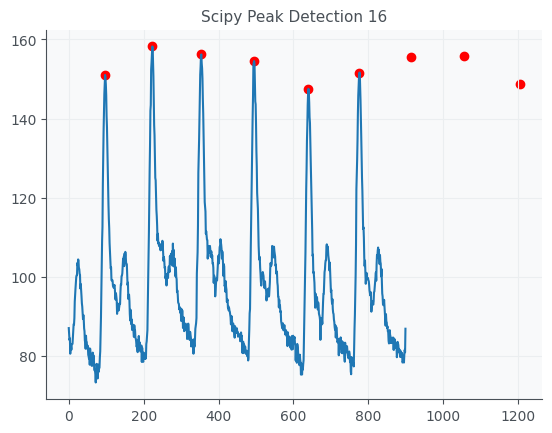

58


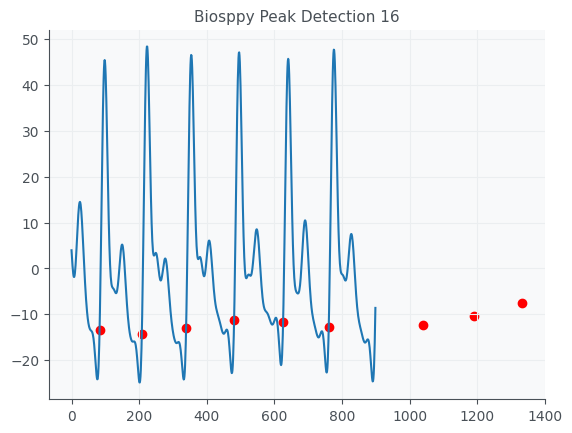

79


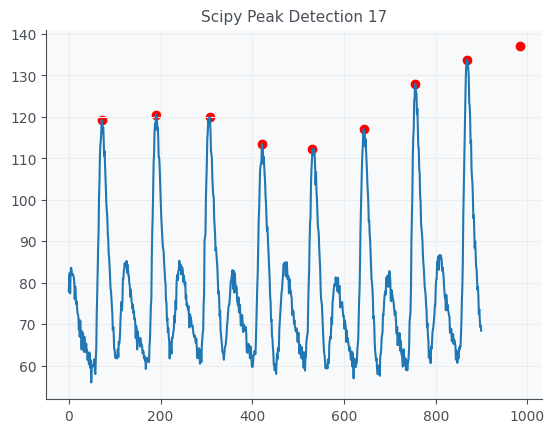

79


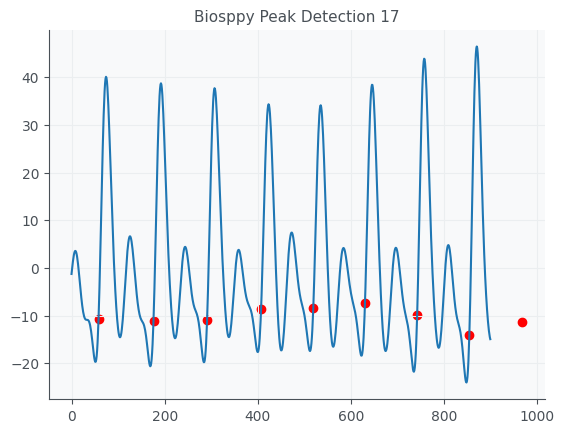

67


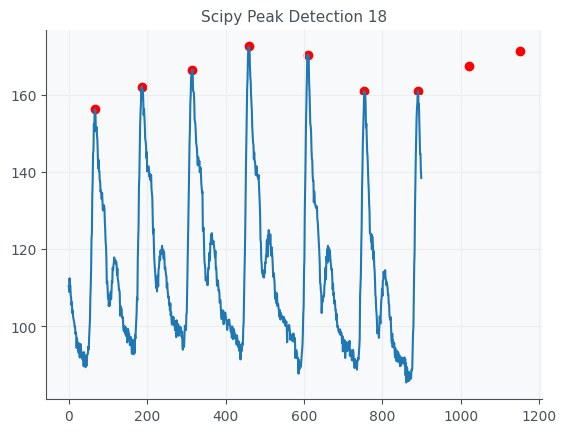

47


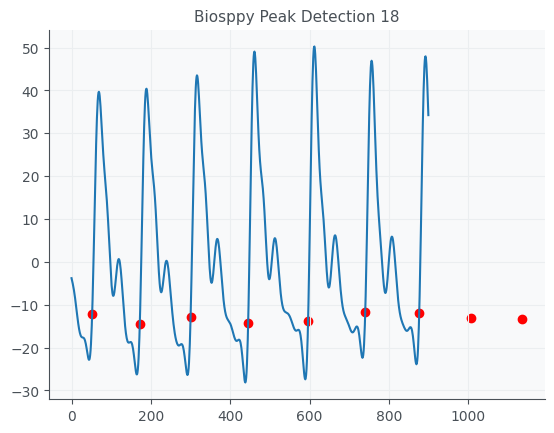

72


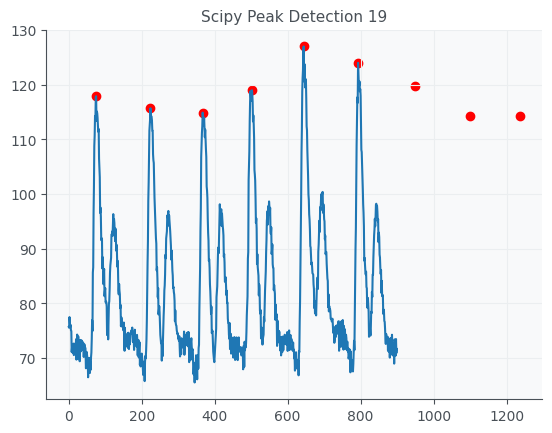

70


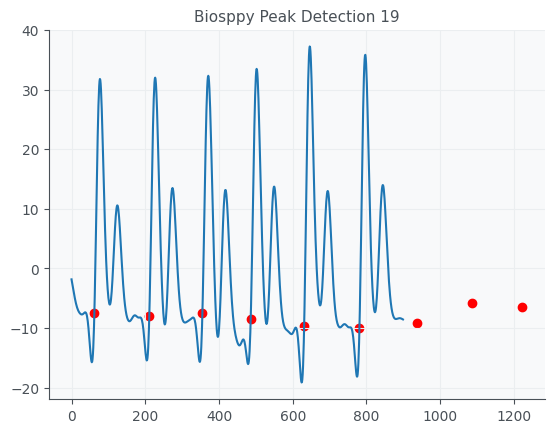

64


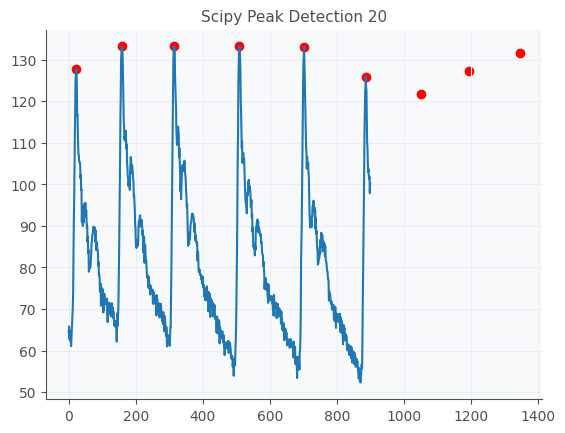

10


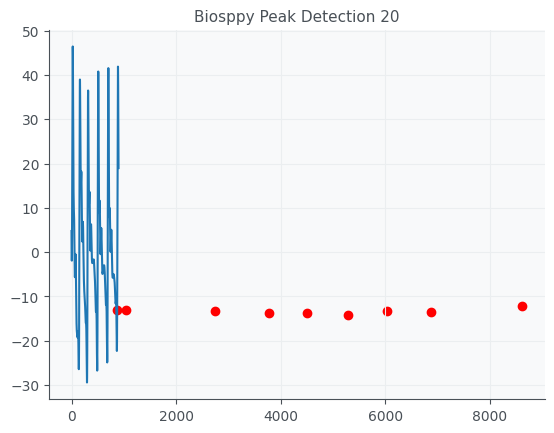

53


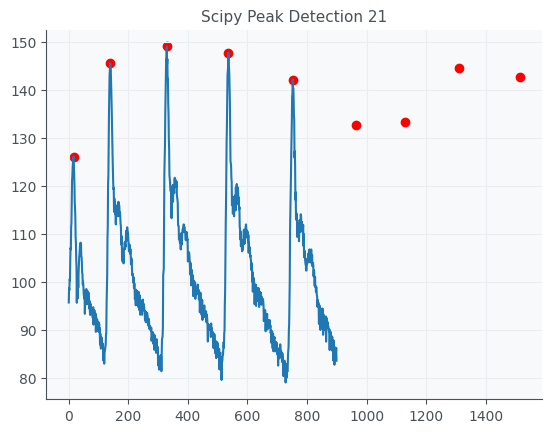

0


c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\biosppy\signals\abp.py:188: RuntimeWarning: Mean of empty slice.
  sq -= sq.mean()
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


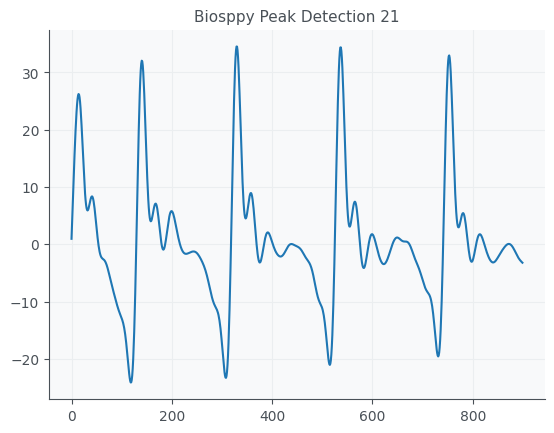

56


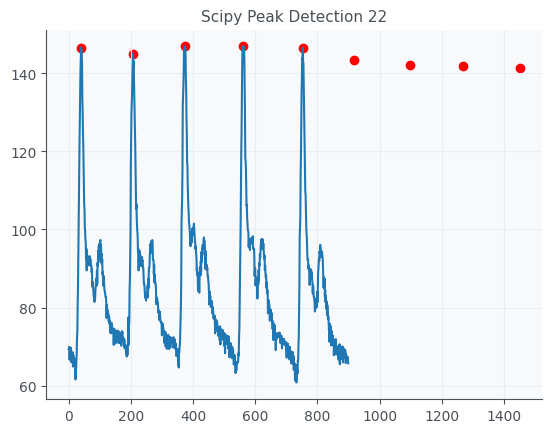

39


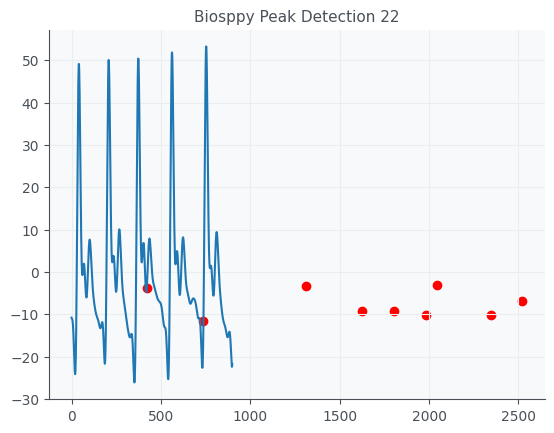

63


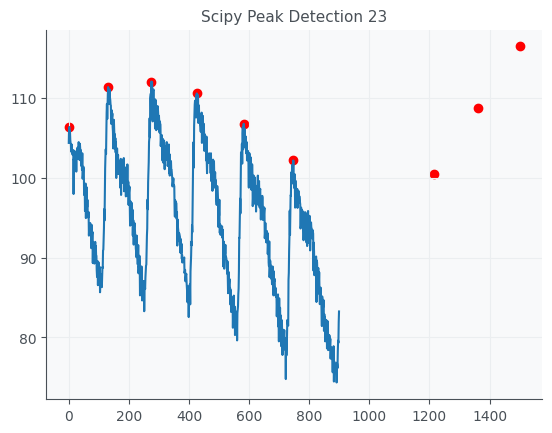

0


c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\biosppy\signals\abp.py:188: RuntimeWarning: Mean of empty slice.
  sq -= sq.mean()
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


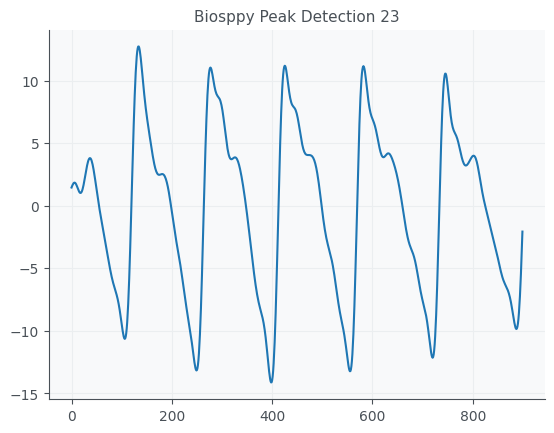

66


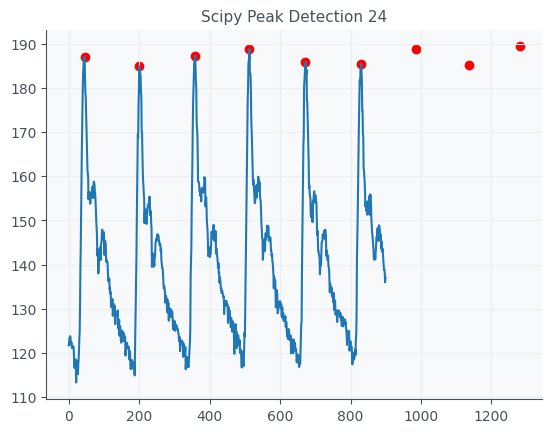

7


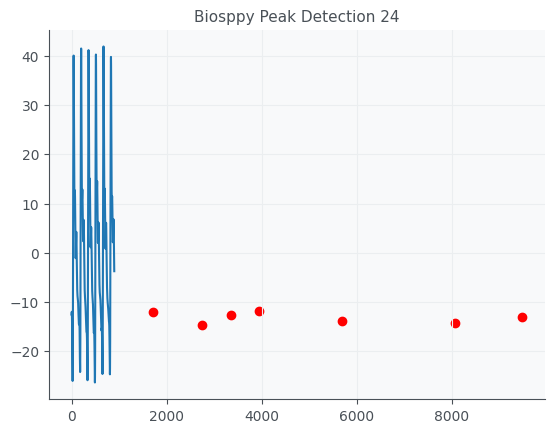

56


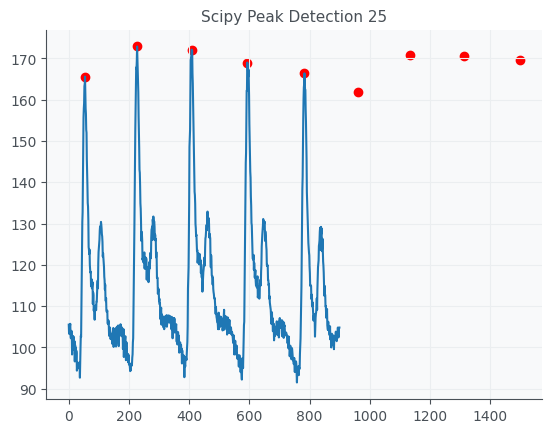

55


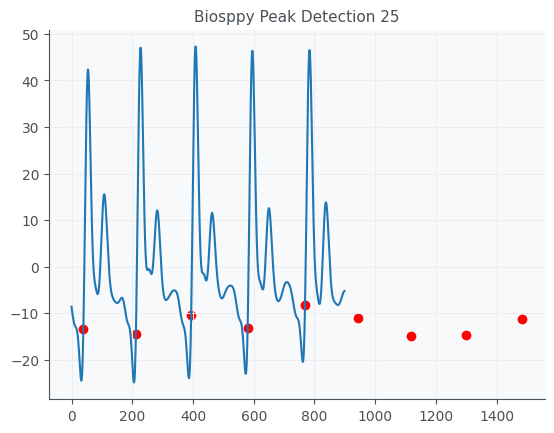

45


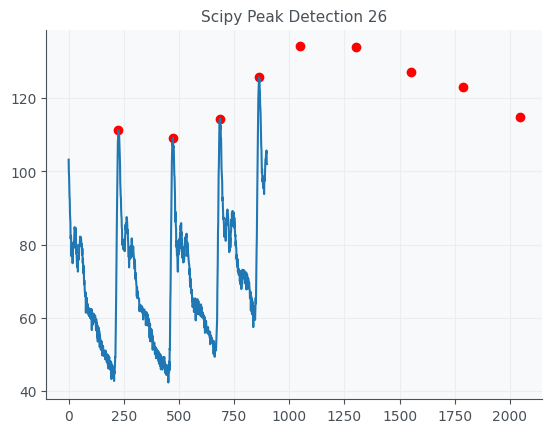

16


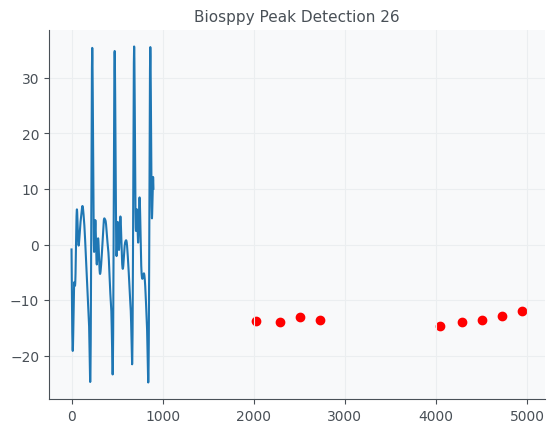

56


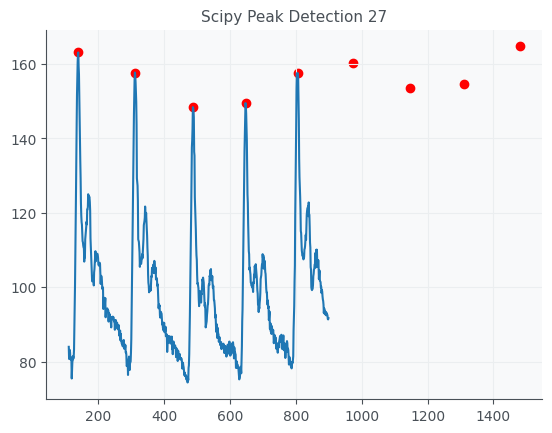

c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\biosppy\signals\abp.py:188: RuntimeWarning: Mean of empty slice.
  sq -= sq.mean()
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


69


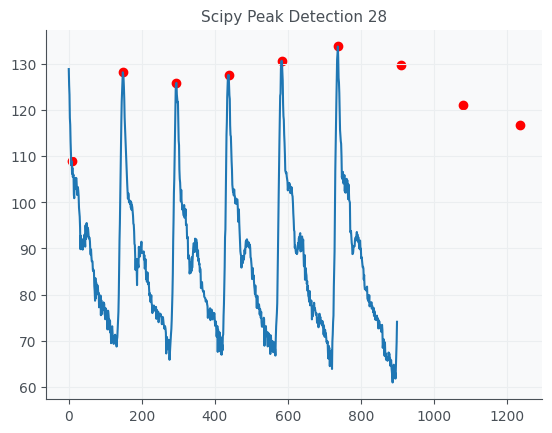

37


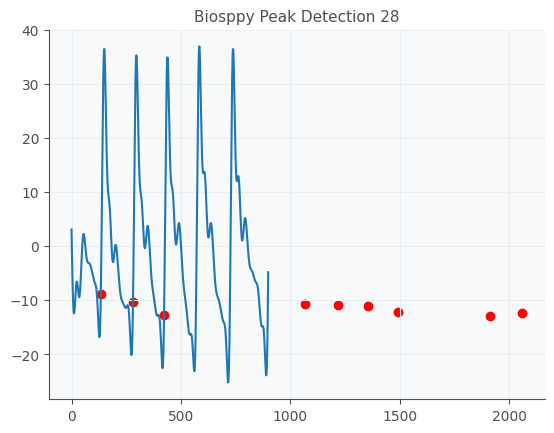

69


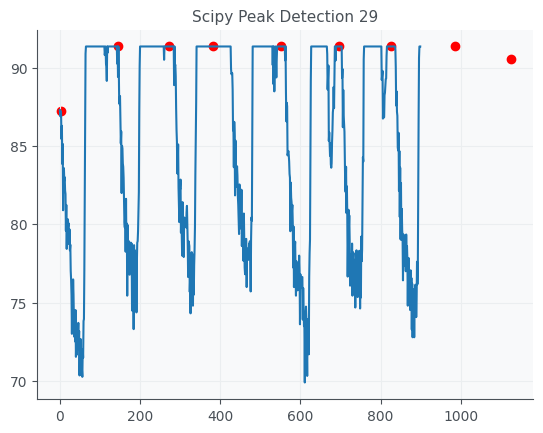

0


c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\biosppy\signals\abp.py:188: RuntimeWarning: Mean of empty slice.
  sq -= sq.mean()
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


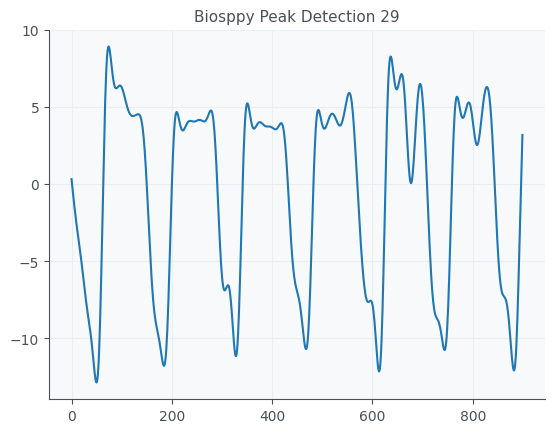

50


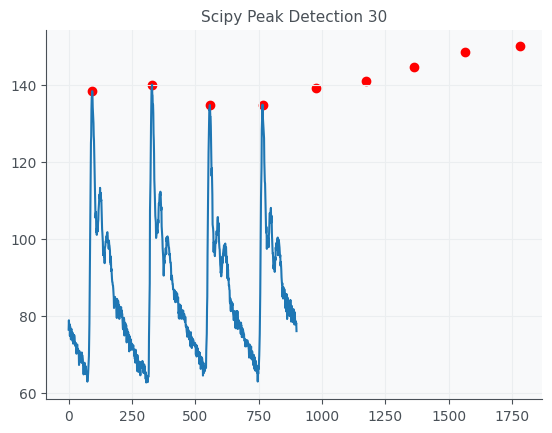

c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\biosppy\signals\abp.py:188: RuntimeWarning: Mean of empty slice.
  sq -= sq.mean()
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


0


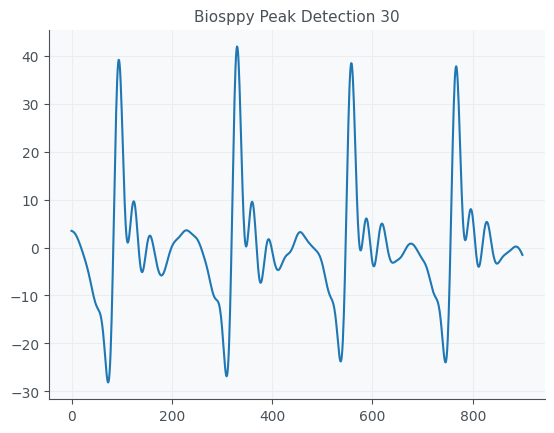

73


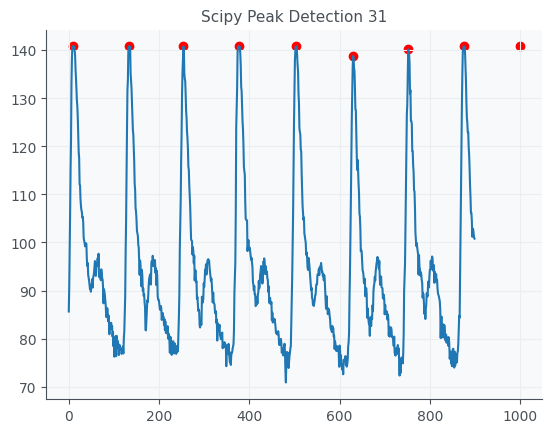

72


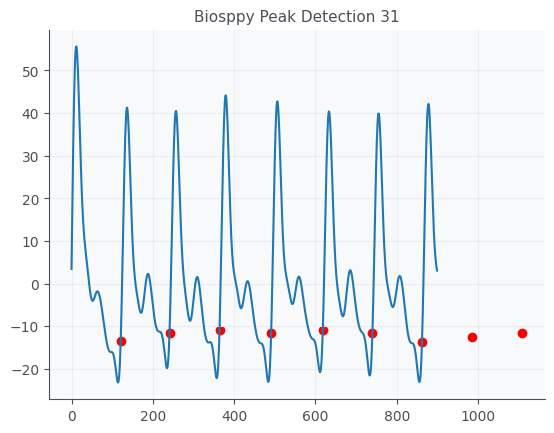

45


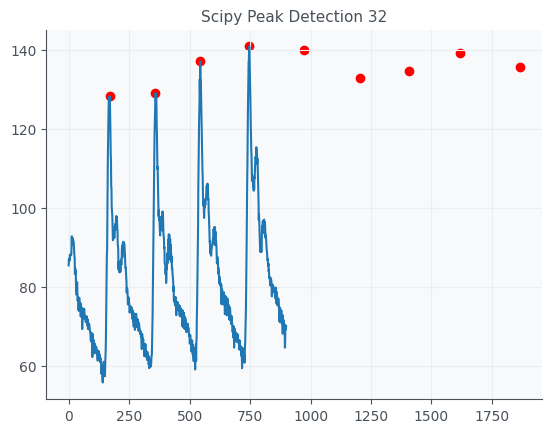

53


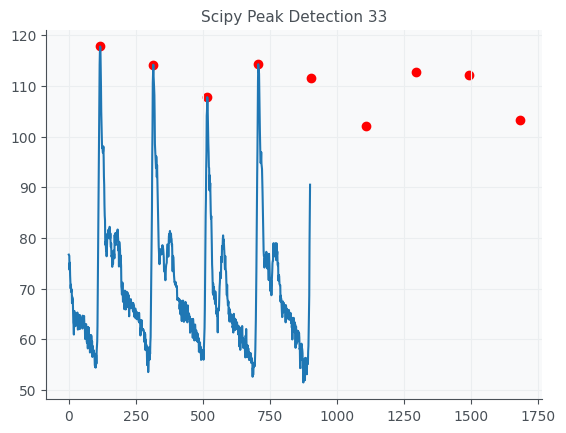

54


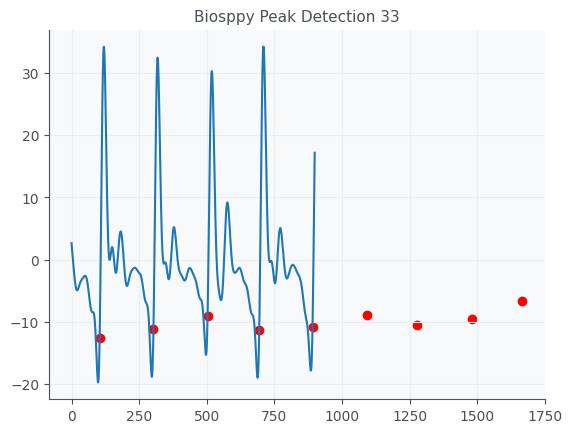

60


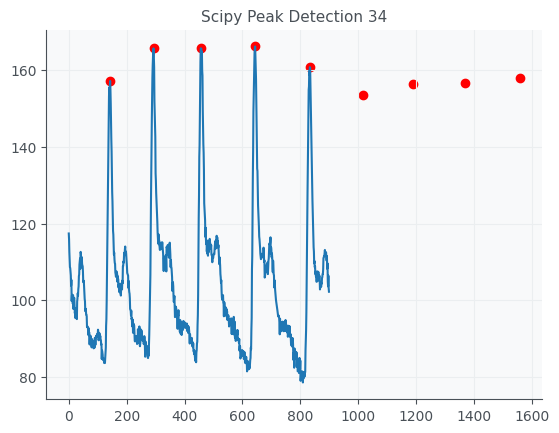

44


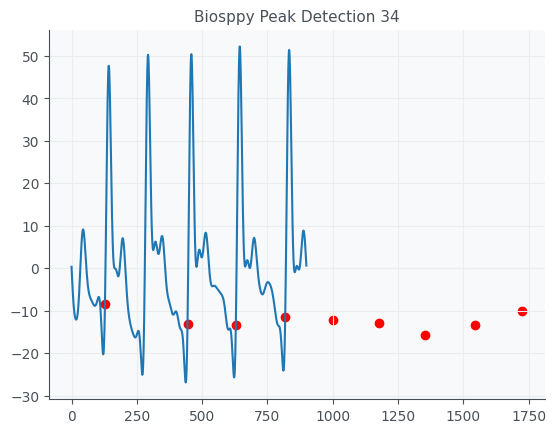

60


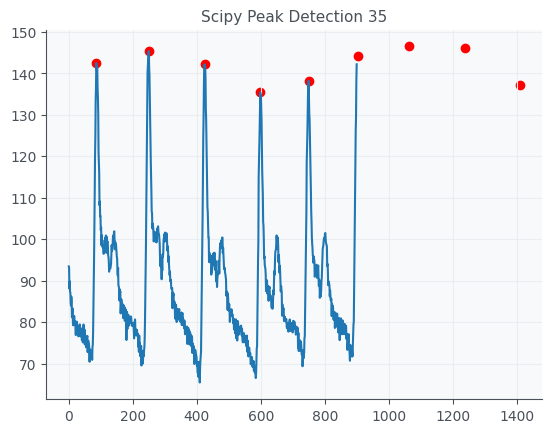

16


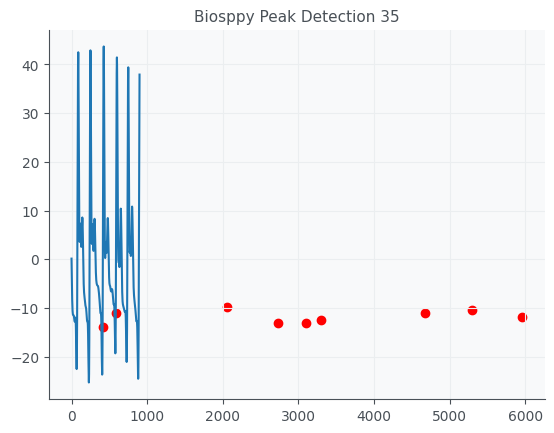

58


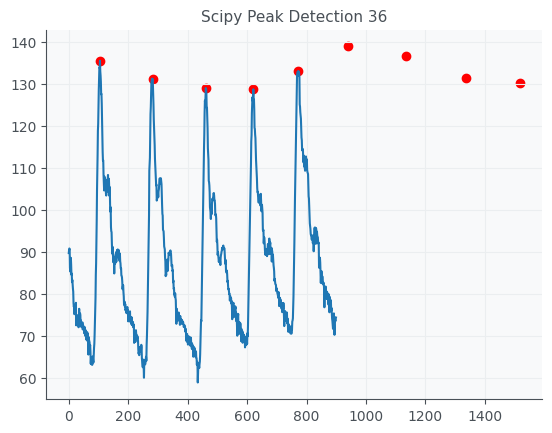

9


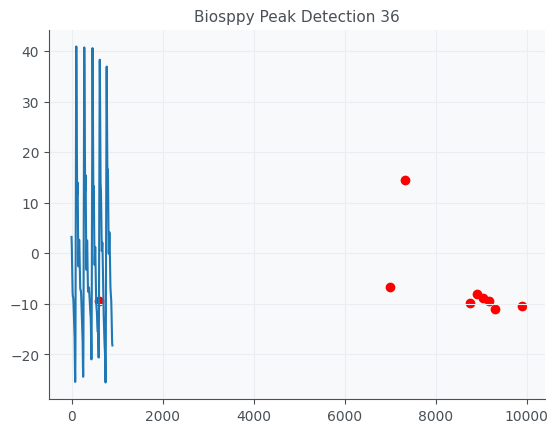

56


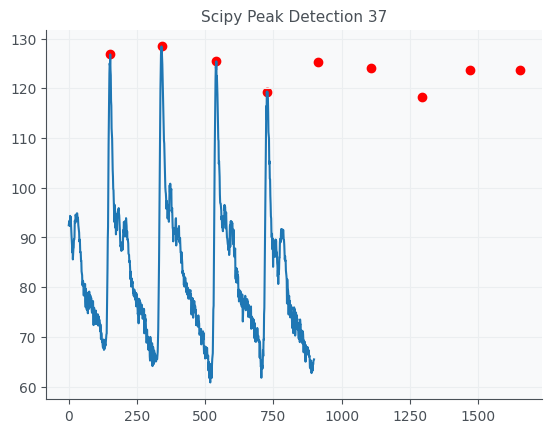

22


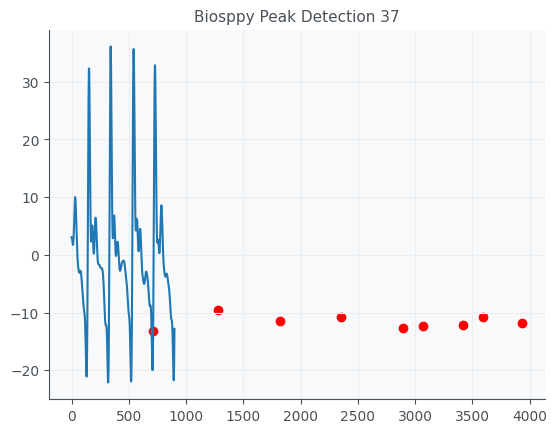

65


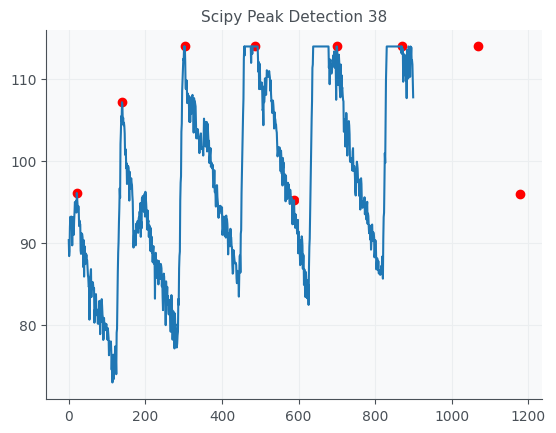

0


c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\biosppy\signals\abp.py:188: RuntimeWarning: Mean of empty slice.
  sq -= sq.mean()
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\user\PycharmProjects\Brainlab\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


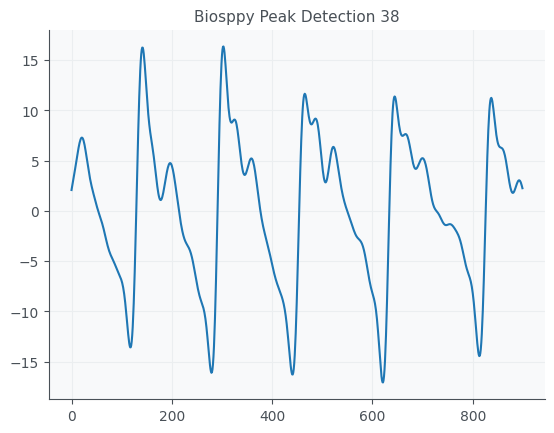

53


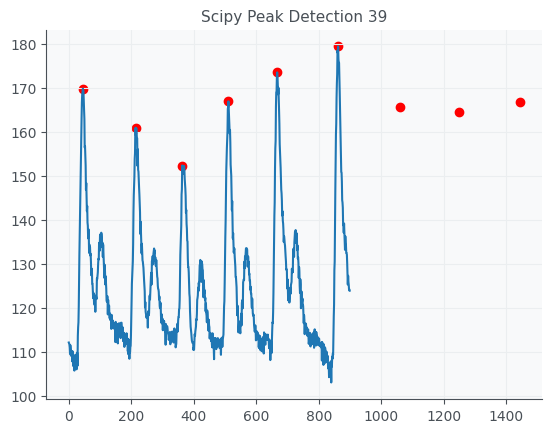

54


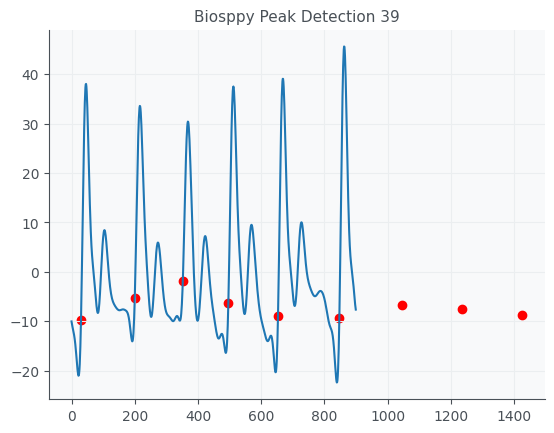

62


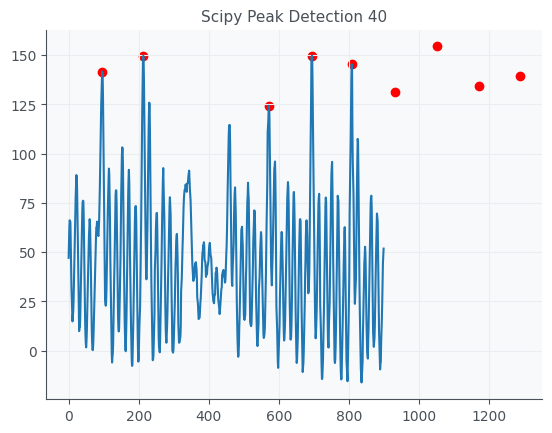

42


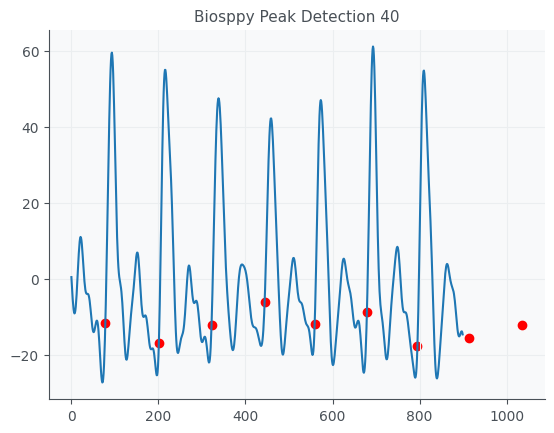

59


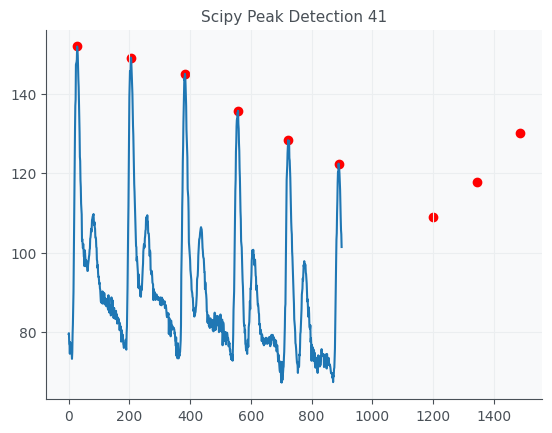

59


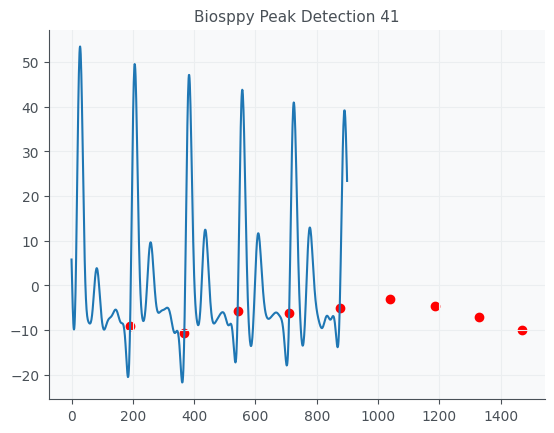

61


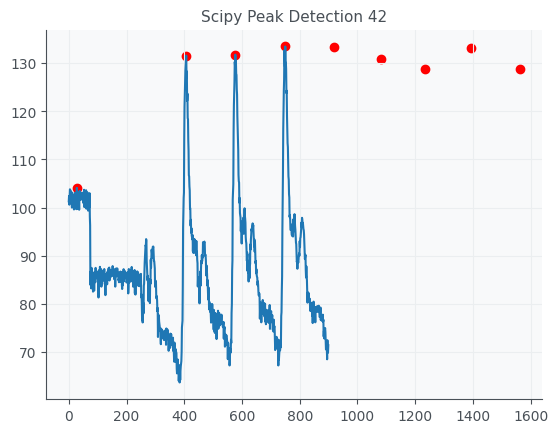

41


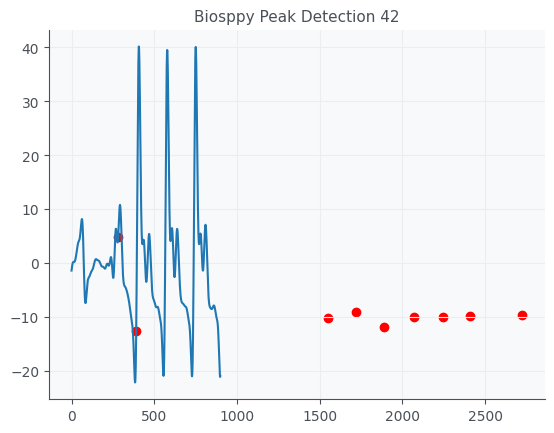

63


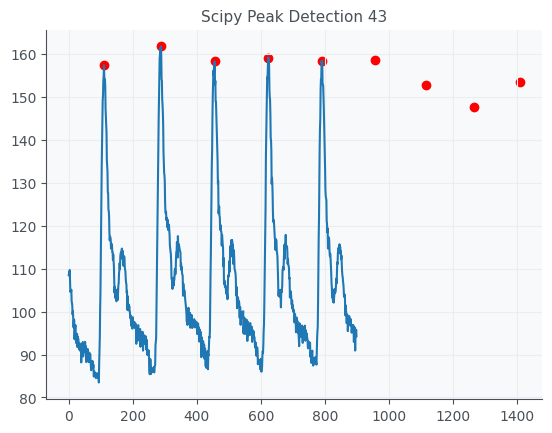

64


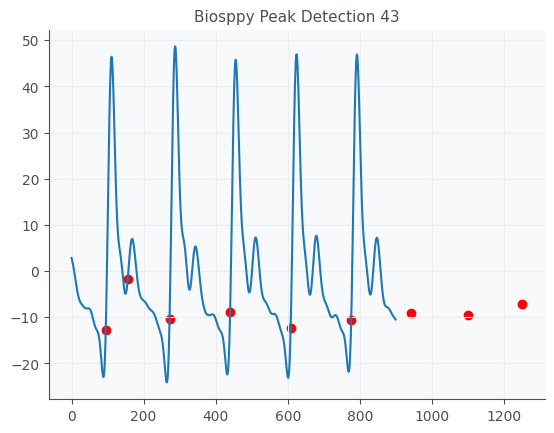

56


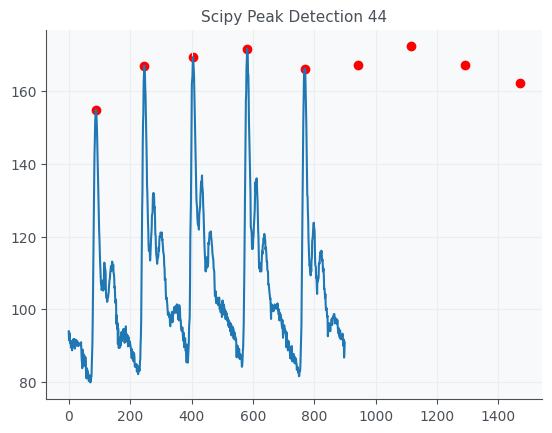

2


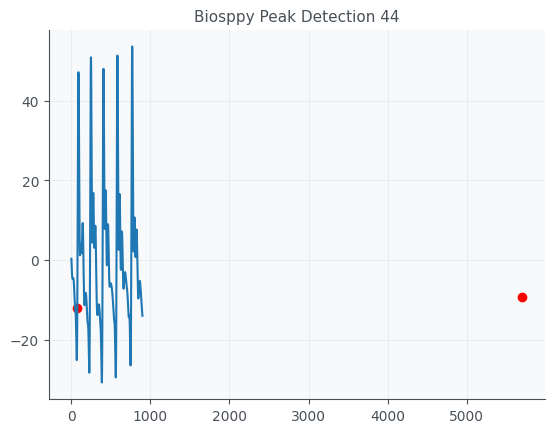

46


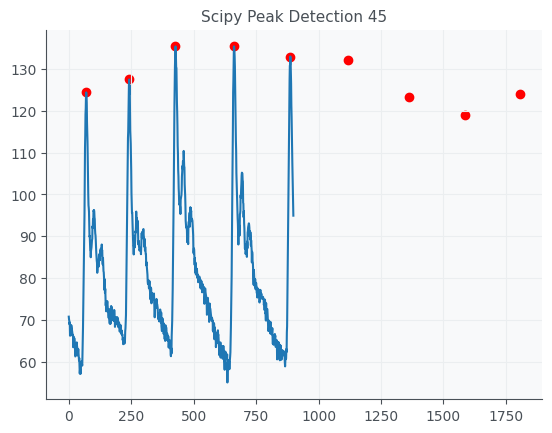

4


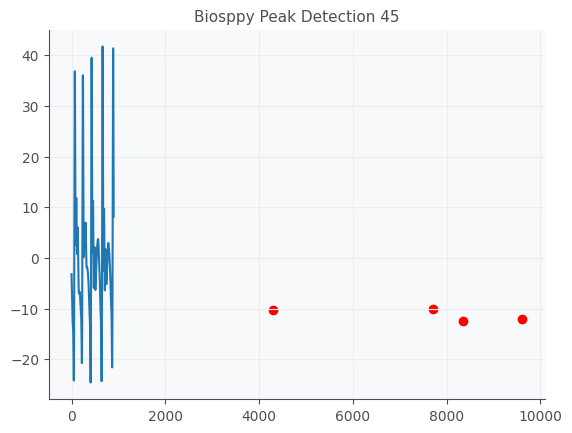

59


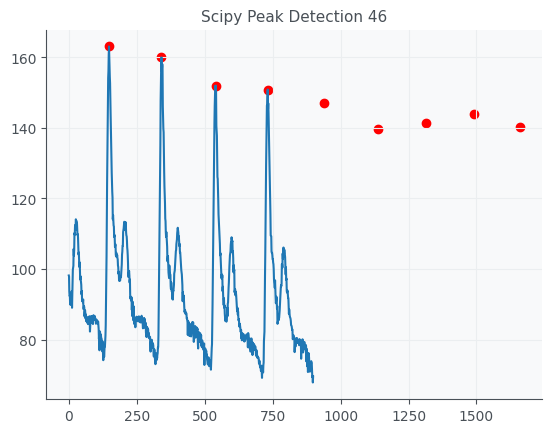

60


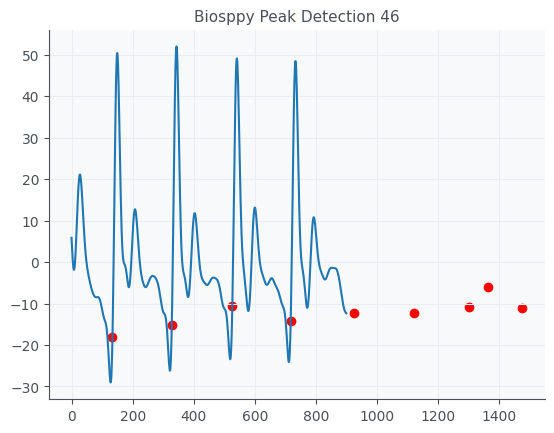

49


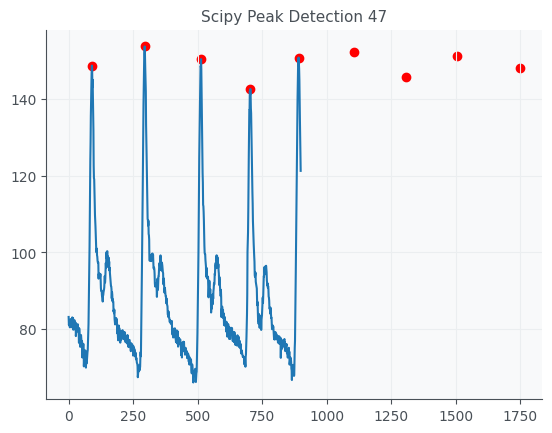

52


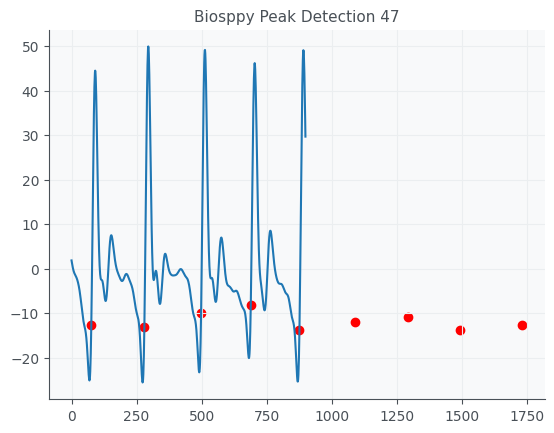

64


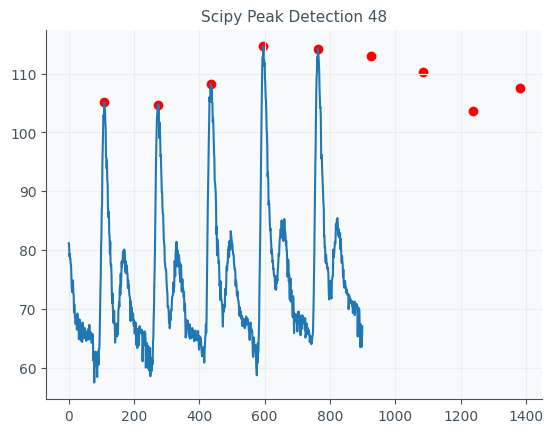

64


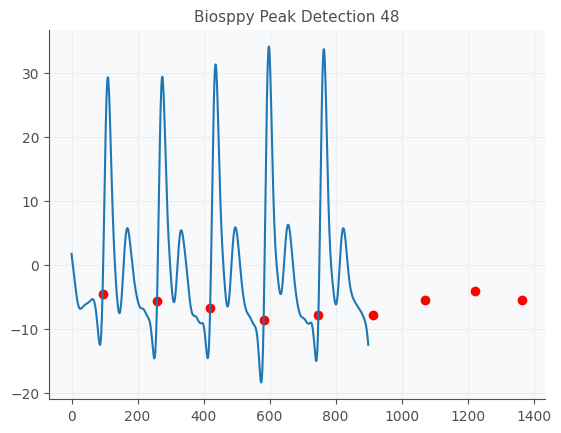

75


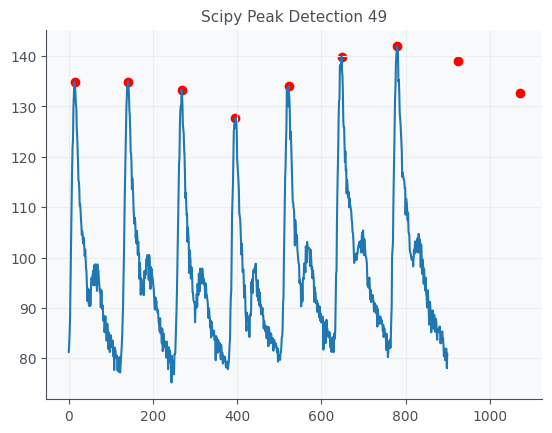

72


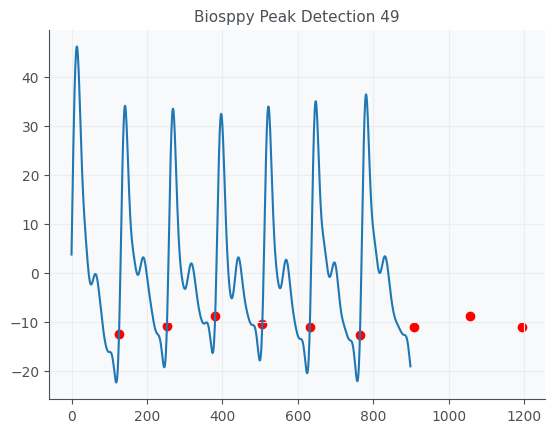

62


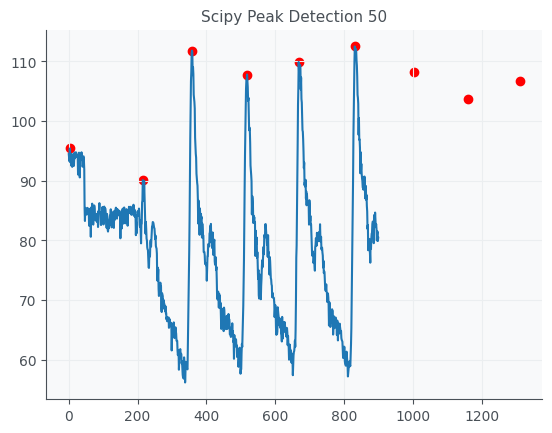

54


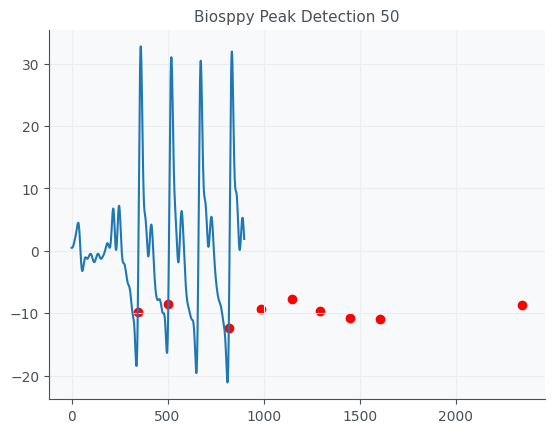

60


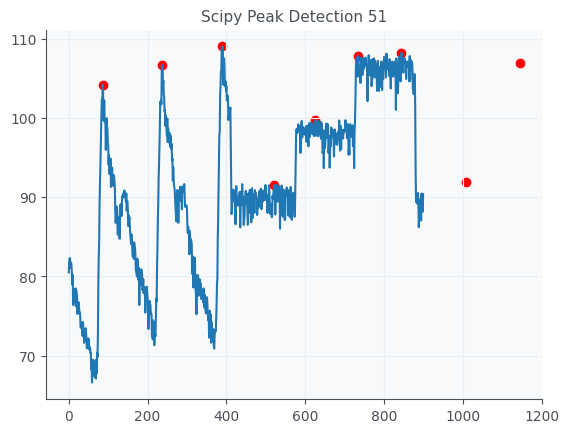

1


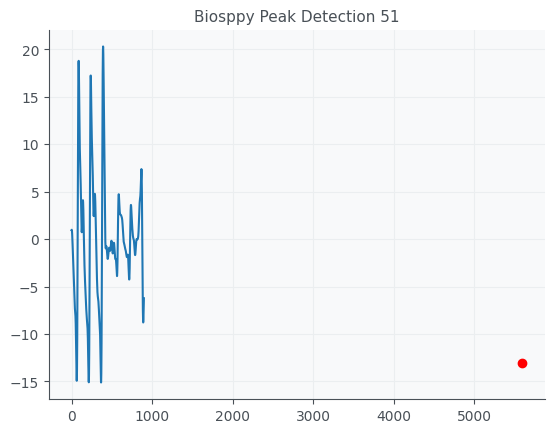

64


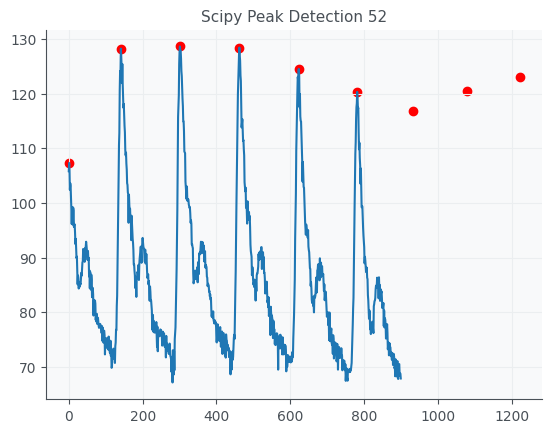

62


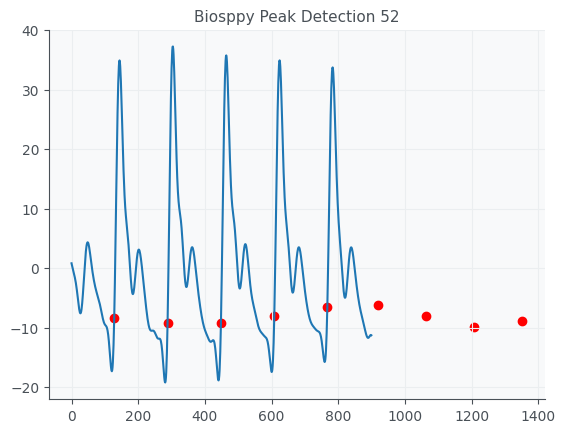

66


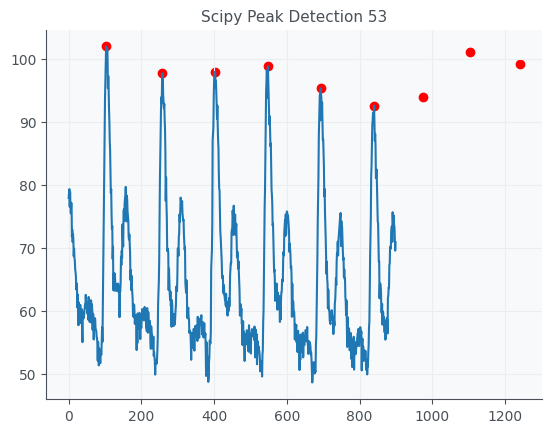

61


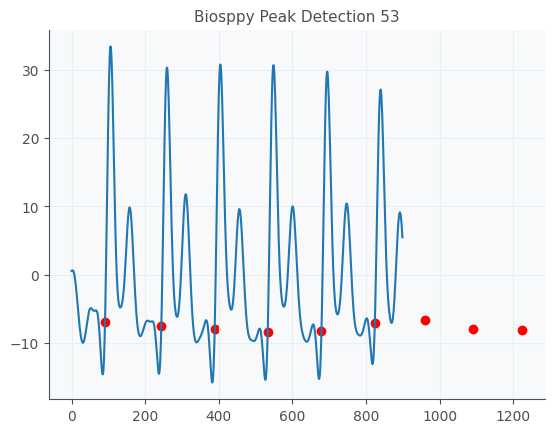

In [7]:
for i, filename in enumerate(os.listdir(NORMO_DIR)):
    if os.path.isfile(os.path.join(NORMO_DIR, filename)):
        file_path = os.path.join(NORMO_DIR, filename)
        try:
            df = prep.read_data(file_path, ABP_COLUMN, sep=';', nrows=10000)
        except KeyError:
            df = prep.read_data(file_path, ALTERNATIVE_ABP_COLUMN, sep=';', nrows=10000)
    
        df.interpolate(method='linear', inplace=True)

        try:
            peaks_1 = ss.find_peaks(x=df["Values"], height=np.max(df["Values"]) * 0.7, distance=100)
            print(len(peaks_1[0]))

            plt.plot(df["Values"][:900])
            plt.scatter(peaks_1[0][:9], df["Values"][peaks_1[0][:9]], color='red')  # Add this line
            plt.title(f'Scipy Peak Detection {i+1}')
            plt.show()

            filtered_abp = biosppy.signals.abp.abp(signal=df['Values'], sampling_rate=200, show=False)[1]
            peaks_2 = biosppy.signals.abp.find_onsets_zong2003(signal=filtered_abp, sampling_rate=200, d1_th = 30, d2_th = 0.1)
            print(len(peaks_2[0]))

            plt.plot(filtered_abp[:900])
            plt.scatter(peaks_2[0][:9], filtered_abp[peaks_2[0][:9]], color='red')  # Add this line
            plt.title(f'Biosppy Peak Detection {i+1}')
            plt.show()
        except ValueError:
            continue


